# Image Modulation with `modulate_image`

This section demonstrates how to use the `modulate_image` function for converting image color and/or manipulating the color channels of images. The function provides flexibility for handling both grayscale and RGB images, allowing users to:
- Convert between grayscale and RGB (Red, Green, and Blue) formats.
- Swap RGB channels.
- Extract specific RGB channels.

However, it's important to note that:

- When converting a grayscale image to RGB (using `mode='rgb'`), the function **duplicates the grayscale values** across all three RGB channels. This means it doesn't map to actual RGB color values but simply replicates the grayscale values for all channels.
- `ch_swap` and `ch_extract` are only applicable to **RGB images**. For grayscale images, these operations will not be performed and a warning will be displayed.
- The arguments `mode`, `ch_swap`, and `ch_extract` can be used **in combination** to perform multiple operations simultaneously. 

## 1. Importing Libraries and Loading an Image

First, we will need to import the necessary libraries and load an image to manipulate. We will use `matplotlib` to display images and `numpy` for array manipulations. We'll also define a sample image below.

Let's begin by importing the libraries:


In [13]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sharpedge.modulate_image import modulate_image

# Set global figure size for all images
plt.rcParams['figure.figsize'] = (3, 3)

In [14]:
# Sample image (RGB)
# Define the size of the image
height, width = 200, 200

# Create an empty image (all black initially)
image = np.zeros((height, width, 3), dtype=np.uint8)

# Divide the image into 4 sections (2x2 grid)
# Top-left: Light Red
image[:height//2, :width//2] = [255, 200, 200]  # Light red

# Top-right: Light Green
image[:height//2, width//2:] = [200, 255, 200]  # Light green

# Bottom-left: Light Blue
image[height//2:, :width//2] = [200, 200, 255]  # Light blue

# Bottom-right: Light Yellow (Red + Green)
image[height//2:, width//2:] = [255, 255, 200]  # Light yellow (mix of red and green)

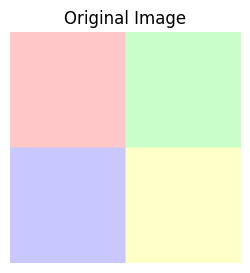

In [15]:
# Display the original image
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')  # Hide axis
plt.show()

## 2. Converting Between Grayscale and RGB

The `modulate_image` function allows us to convert between grayscale and RGB formats. Let's start by converting an RGB image to grayscale and then back to RGB.

### Converting RGB to Grayscale
We'll first convert our RGB image to grayscale using the `modulate_image` function with the `mode='gray'` option.


Converting RGB to grayscale...


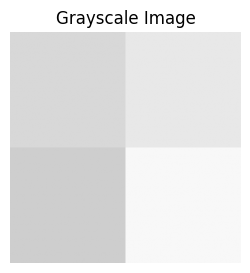

Grayscale image in 2D: (200, 200)


In [16]:
# Convert the image to grayscale using modulate_image
grayscale_image = modulate_image(image, mode='gray')

# Display the grayscale image
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)  # Explicitly setting 0-255 range
plt.title('Grayscale Image')
plt.axis('off')
plt.show()
print(f'Grayscale image in 2D: {np.shape(grayscale_image)}')

### Converting Grayscale Back to RGB
Next, let's convert our grayscale image back to RGB format. Since the grayscale image is essentially a 2D array, we will use the `modulate_image` function with the `mode='rgb'` option. Remember that this conversion doesn't map grayscale to actual RGB colors, but simply replicates the grayscale values across all RGB channels.


Converting grayscale to RGB...


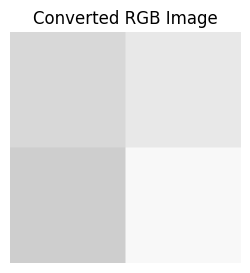

RGB image in 3D: (200, 200, 3)


In [17]:
# Convert the grayscale image back to RGB
rgb_again = modulate_image(grayscale_image, mode='rgb')

# Display the converted RGB image
plt.imshow(rgb_again)
plt.title('Converted RGB Image')
plt.axis('off')
plt.show()
print(f'RGB image in 3D: {np.shape(rgb_again)}')

## 3. Swapping RGB Channels

The `modulate_image` function also allows us to swap the RGB channels. This can be useful if we want to modify the appearance of an image by changing the color relationships.

### Swapping Red and Blue Channels
Let's swap the Red and Blue channels of the image to see the effect of this manipulation.

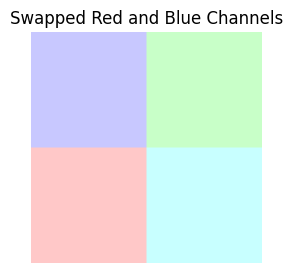

In [18]:
# Swap the Red and Blue channels using modulate_image
swapped_image = modulate_image(image, ch_swap=(2, 1, 0))

# Display the swapped image
plt.imshow(swapped_image)
plt.title('Swapped Red and Blue Channels')
plt.axis('off')
plt.show()

## 4. Extracting Certain RGB Channels

The function also provides the ability to extract specific RGB channels from an image. Let's demonstrate this by extracting the Red channel.

### Extracting the Red Channel
We can use the `ch_extract` parameter to extract only the Red channel.

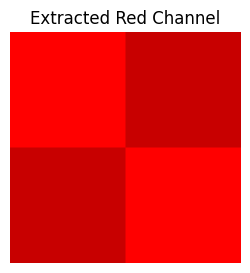

In [19]:
# Extract only the Red channel using modulate_image
red_channel = modulate_image(image, ch_extract=[0])

# Display the extracted Red channel
plt.imshow(red_channel)
plt.title('Extracted Red Channel')
plt.axis('off')
plt.show()

### Extracting Multiple Channels
We can also extract multiple channels at once. For example, let's extract the Green and Blue channels. A friendly reminder that `ch_extract` supports up to 2 elements. For 3-channel extraction, use `ch_swap` to swap the respective channels.

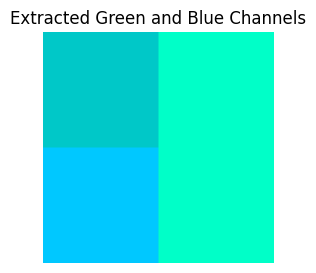

In [20]:
# Extract the Green and Blue channels using modulate_image
green_blue_channels = modulate_image(image, ch_extract=[1, 2])

# Display the extracted Green and Blue channels
plt.imshow(green_blue_channels)
plt.title('Extracted Green and Blue Channels')
plt.axis('off')
plt.show()

## 5. Combining Multiple Operations

In this section, we'll demonstrate how to combine all the operations (conversion, channel swapping, and extraction) into a single function call.

### Example: Convert Grayscale to RGB, Swap Channels, and Extract Red Channel
We will convert the image to grayscale, then to RGB, swap the Red and Blue channels, and finally extract the Green channel. 

Converting grayscale to RGB...


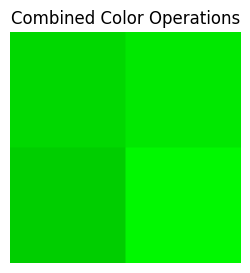

In [21]:
# Perform all operations in combination
final_image = modulate_image(grayscale_image, mode='rgb', ch_swap=(2, 1, 0), ch_extract=[1])

# Display the final modified image
plt.imshow(final_image)
plt.title('Combined Color Operations')
plt.axis('off')
plt.show()

## Conclusion

In this tutorial, we demonstrated how to use the `modulate_image` function to perform various image manipulation tasks, including converting between grayscale and RGB, swapping and extracting RGB channels, and combining these operations.

With this knowledge, you can now manipulate image channels in a flexible way to suit your needs in image processing applications. Don't forget that channel swapping and extraction are only applicable to RGB images.

Happy coding!